In [91]:
import numpy as np
import pandas as pd 
import seaborn as sns 
from matplotlib import  pyplot as plt 

In [92]:
custchurn=pd.read_csv('Churn_Modelling.csv')

In [93]:
custchurn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [94]:
custchurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [95]:
custchurn.shape

(10000, 14)

In [96]:
custchurn=custchurn.convert_dtypes()

In [97]:
custchurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  Int64  
 1   CustomerId       10000 non-null  Int64  
 2   Surname          10000 non-null  string 
 3   CreditScore      10000 non-null  Int64  
 4   Geography        10000 non-null  string 
 5   Gender           10000 non-null  string 
 6   Age              10000 non-null  Int64  
 7   Tenure           10000 non-null  Int64  
 8   Balance          10000 non-null  Float64
 9   NumOfProducts    10000 non-null  Int64  
 10  HasCrCard        10000 non-null  Int64  
 11  IsActiveMember   10000 non-null  Int64  
 12  EstimatedSalary  10000 non-null  Float64
 13  Exited           10000 non-null  Int64  
dtypes: Float64(2), Int64(9), string(3)
memory usage: 1.2 MB


In [98]:
custchurn.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [99]:
custchurn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [100]:
custchurn.drop(['RowNumber','CustomerId'],axis=1,inplace=True)

In [101]:
custchurn['Surname'].unique()

<StringArray>
[  'Hargrave',       'Hill',       'Onio',       'Boni',   'Mitchell',
        'Chu',   'Bartlett',     'Obinna',         'He',         'H?',
 ...
 'MacPherson',      'Parks',      'Edith',     'Lajoie',     'Torode',
    'Salinas',  'Cleveland',  'Kashiwagi',   'Aldridge',   'Burbidge']
Length: 2932, dtype: string

In [102]:
custchurn.duplicated().sum()

0

In [103]:
custchurn.drop('Surname',axis=1,inplace=True)

# Explore data

<AxesSubplot:>

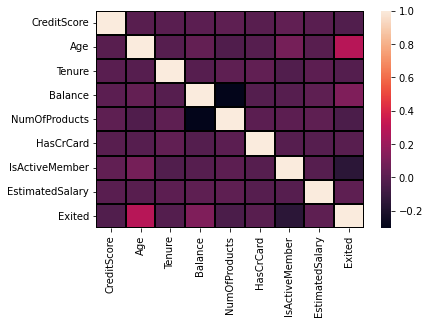

In [104]:
sns.heatmap(data=custchurn.corr(),linecolor='Black',linewidths=2,)

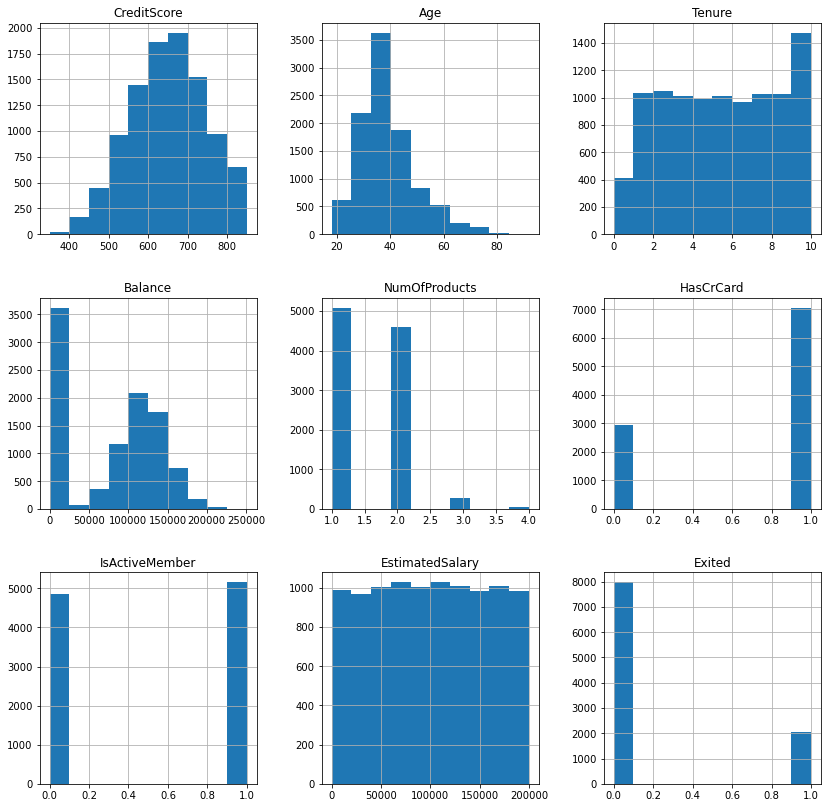

In [105]:
custchurn.hist(figsize=(14,14))
plt.show()

### Distrbution of age by gender

In [106]:
custchurn['Age']=custchurn['Age'].astype(int)
custchurn['EstimatedSalary']=custchurn['EstimatedSalary'].astype(int)
custchurn['Balance']=custchurn['Balance'].astype(int)

<AxesSubplot:xlabel='Gender', ylabel='Age'>

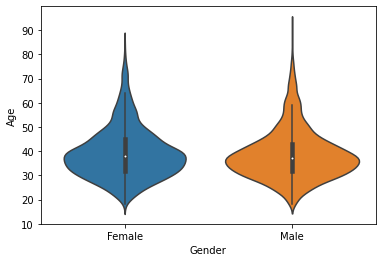

In [107]:
sns.violinplot(x='Gender',y='Age',data=custchurn)

In [108]:
custchurn.groupby('Gender')['Age'].apply(lambda x: x.max()-x.min())

Gender
Female    67
Male      74
Name: Age, dtype: int64

### Distrbution of balance by gender

<AxesSubplot:xlabel='Gender', ylabel='Balance'>

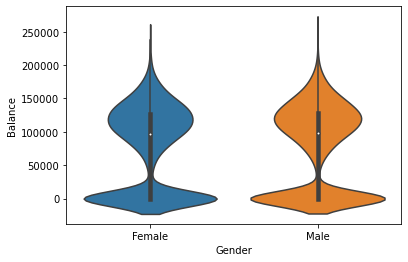

In [109]:
sns.violinplot(x='Gender',y='Balance',data=custchurn)

# Questions about data

### Q0: which country has the most exit percentage ?

<AxesSubplot:ylabel='Exited'>

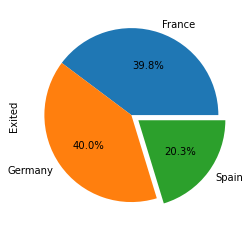

In [110]:
custchurn.groupby('Geography')['Exited'].sum().plot(kind='pie',autopct='%1.1f%%',explode=(0,0,0.1))

### Q1 which gender more likely to leave 

In [111]:
custchurn.Gender.astype('category')
custchurn.Exited.astype('category')

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: category
Categories (2, object): [0, 1]

<AxesSubplot:ylabel='Exited'>

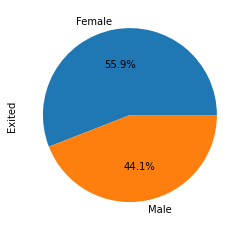

In [112]:
custchurn.groupby('Gender')['Exited'].sum().plot(kind='pie',autopct='%1.1f%%')

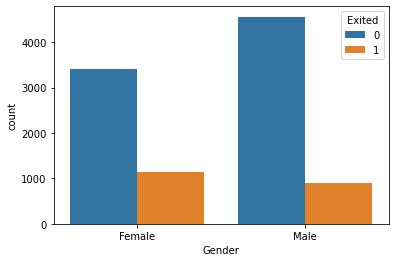

In [113]:
sns.countplot(x='Gender',data=custchurn,hue='Exited')
plt.show()

Females are more likely to exit BUT they are close to males 

### Q2: is the one who has a huge balance has a good estimated salary and how it's realted to number of products

In [114]:
custchurn['Tenure']=custchurn['Tenure'].astype('int')
custchurn['NumOfProducts']=custchurn['NumOfProducts'].astype('int')

<AxesSubplot:xlabel='Balance', ylabel='EstimatedSalary'>

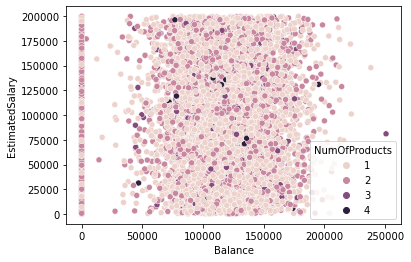

In [115]:
sns.scatterplot(x='Balance',y='EstimatedSalary',data=custchurn,hue='NumOfProducts')

No linear relationship BUT we can categorize balance OR salary and see more details 

<AxesSubplot:>

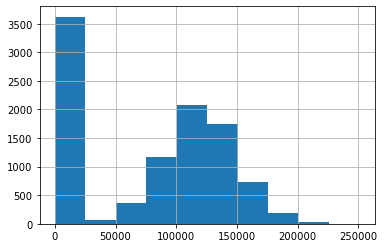

In [116]:
custchurn['Balance'].hist()

In [117]:
def categorize_balance(x):
    if x>=0 and x<25000:
        return 'Low'
    if x>=25000 and x<75000:
        return 'Medium'
    if x>=75000 and x<175000:
        return 'Above medium'
    if x>=175000 and x<250000:
        return 'High'

In [118]:
custchurn['balance']=custchurn['Balance'].apply(categorize_balance)

<AxesSubplot:>

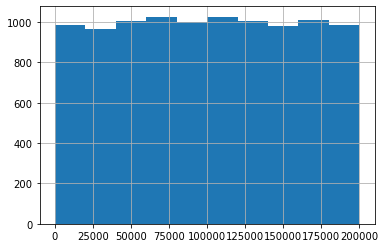

In [119]:
custchurn['EstimatedSalary'].hist()

In [120]:
custchurn['salary']=pd.cut(x=custchurn['EstimatedSalary'],labels=['Low','Medium','Above medium','High'],bins=[0,75000,100000,150000,200000])

In [121]:
custchurn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,balance,salary
0,619,France,Female,42,2,0,1,1,1,101348,1,Low,Above medium
1,608,Spain,Female,41,1,83807,1,0,1,112542,0,Above medium,Above medium
2,502,France,Female,42,8,159660,3,1,0,113931,1,Above medium,Above medium
3,699,France,Female,39,1,0,2,0,0,93826,0,Low,Medium
4,850,Spain,Female,43,2,125510,1,1,1,79084,0,Above medium,Medium


<AxesSubplot:xlabel='balance', ylabel='count'>

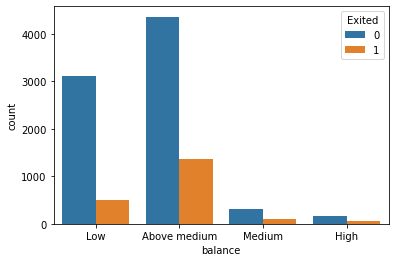

In [122]:
sns.countplot(x='balance',data=custchurn,hue='Exited')

<AxesSubplot:xlabel='balance', ylabel='count'>

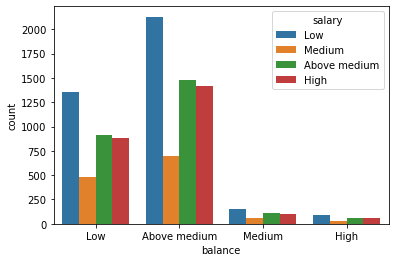

In [123]:
sns.countplot(x='balance',hue='salary',data=custchurn)

Low salary is the highest in any balance category wich means that high balance does not mean high salary

### Q3: what range of balance more likely to left the bank 

<AxesSubplot:xlabel='balance', ylabel='count'>

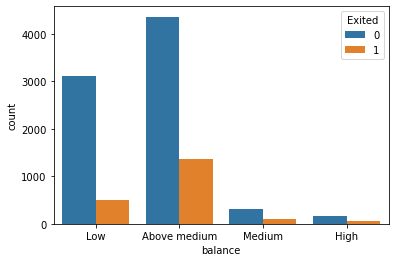

In [124]:
sns.countplot(x='balance',data=custchurn,hue='Exited')

<AxesSubplot:xlabel='balance'>

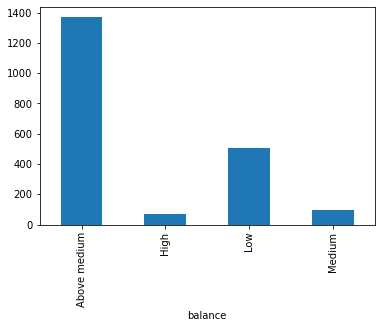

In [125]:
custchurn.groupby('balance')['Exited'].sum().plot(kind='bar')

above medium balance 

### Q4: which age range more likely to leave the bank ?

<AxesSubplot:>

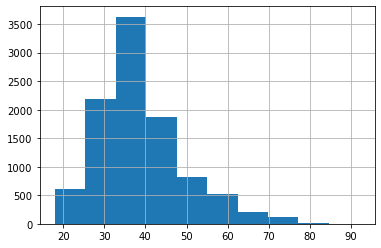

In [126]:
custchurn['Age'].hist()

In [127]:
def categorize_age(x):
    if x >= 18 and x<=24:
        return 'Youth'
    if x>=25 and x<=55 :
        return 'Adult'
    if x>=65:
        return 'Senior'

In [128]:
custchurn['age']=custchurn['Age'].apply(categorize_age)

In [129]:
custchurn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,balance,salary,age
0,619,France,Female,42,2,0,1,1,1,101348,1,Low,Above medium,Adult
1,608,Spain,Female,41,1,83807,1,0,1,112542,0,Above medium,Above medium,Adult
2,502,France,Female,42,8,159660,3,1,0,113931,1,Above medium,Above medium,Adult
3,699,France,Female,39,1,0,2,0,0,93826,0,Low,Medium,Adult
4,850,Spain,Female,43,2,125510,1,1,1,79084,0,Above medium,Medium,Adult


### Q5: which range of age more likely to leave the bank

<AxesSubplot:xlabel='age', ylabel='count'>

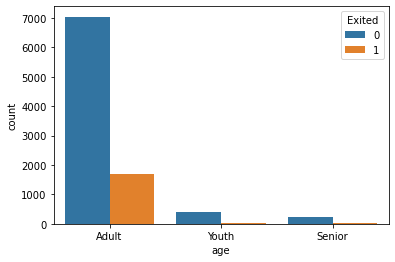

In [130]:
sns.countplot(x='age',data=custchurn,hue='Exited')

Adult age 

### Q6: is the one who have short period with the bank more ikely to leave?

<AxesSubplot:>

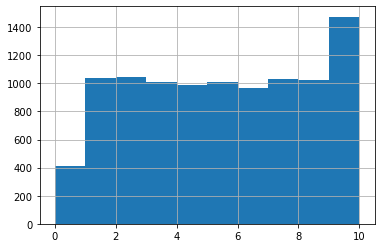

In [131]:
custchurn['Tenure'].hist()

In [132]:
def categorize_tenure(x):
    if x==0 or x==1:
        return 'Recent'
    if x>1 and x <=6:
        return 'New'
    if x>=6:
        return 'old'

In [133]:
custchurn['tenure']=custchurn['Tenure'].apply(categorize_tenure)

In [134]:
custchurn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,balance,salary,age,tenure
0,619,France,Female,42,2,0,1,1,1,101348,1,Low,Above medium,Adult,New
1,608,Spain,Female,41,1,83807,1,0,1,112542,0,Above medium,Above medium,Adult,Recent
2,502,France,Female,42,8,159660,3,1,0,113931,1,Above medium,Above medium,Adult,old
3,699,France,Female,39,1,0,2,0,0,93826,0,Low,Medium,Adult,Recent
4,850,Spain,Female,43,2,125510,1,1,1,79084,0,Above medium,Medium,Adult,New


<AxesSubplot:xlabel='tenure', ylabel='count'>

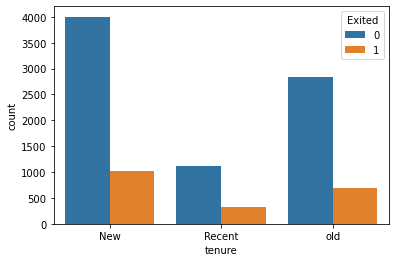

In [135]:
sns.countplot(x='tenure',data=custchurn,hue='Exited')

<AxesSubplot:xlabel='tenure'>

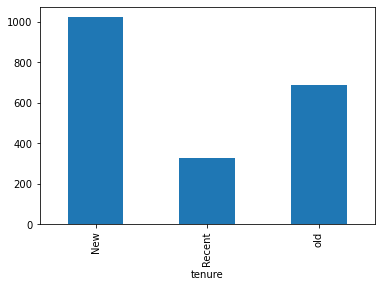

In [136]:
custchurn.groupby('tenure')['Exited'].sum().plot(kind='bar')

New clients tends to leave the bank 

### Q7: which Age holds credit card the most ?

<AxesSubplot:xlabel='age'>

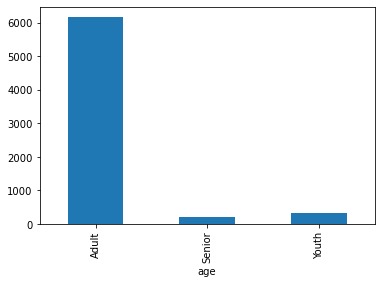

In [137]:
custchurn.groupby('age')['HasCrCard'].sum().plot(kind='bar')

Adult

### Q8: Estimated salary for each country

<AxesSubplot:xlabel='Geography'>

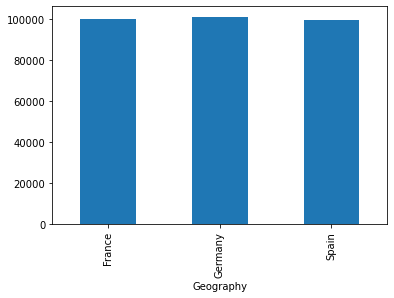

In [138]:
custchurn.groupby('Geography')['EstimatedSalary'].mean().plot(kind='bar')

all countries are allmost the same 

### Q9: in which country the clients are most active ?

In [139]:
x=custchurn.groupby('Geography')['IsActiveMember'].sum()
x

Geography
France     2591
Germany    1248
Spain      1312
Name: IsActiveMember, dtype: Int64

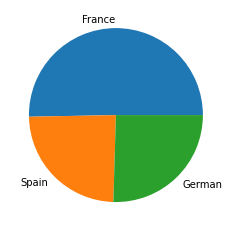

In [140]:
plt.pie(x,labels=['France','Spain','German'])
plt.show()

France more active 

In [141]:
x=custchurn.groupby('Geography')['Exited'].sum()


### Q10: in which country the clients more likely to change the bank ?

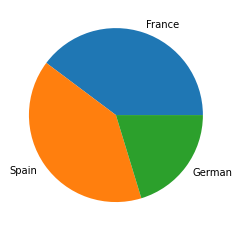

In [142]:
plt.pie(x,labels=['France','Spain','German'])
plt.show()

France and spain

### Q11:are active clients are more likely to stay ?

<AxesSubplot:ylabel='Exited'>

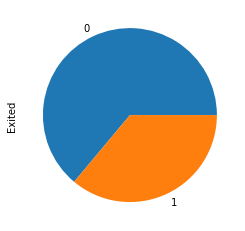

In [143]:
custchurn.groupby('IsActiveMember')['Exited'].sum().plot(kind='pie')

so the assumption is true

### Q12: which country has the most stable clients (don't change thier bank alot) ?

<AxesSubplot:xlabel='Geography', ylabel='count'>

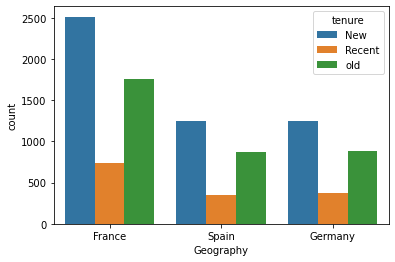

In [144]:
sns.countplot(data=custchurn,hue='tenure',x='Geography')

In [145]:
len(custchurn[(custchurn['Geography']=='France') & (custchurn['tenure']=='old')])/len(custchurn[custchurn['Geography']=='France'])*100

35.18149182289589

In [146]:
len(custchurn[(custchurn['Geography']=='Spain') & (custchurn['tenure']=='old')])/len(custchurn[custchurn['Geography']=='Spain'])*100

35.40573274121922

In [147]:
len(custchurn[(custchurn['Geography']=='Germany') & (custchurn['tenure']=='old')])/len(custchurn[custchurn['Geography']=='Germany'])*100

35.31287365484257

they are the same howere the plot doesn't show that 

### Q13: doeas things like balance , salary , tenure affects credit score ?

<AxesSubplot:xlabel='Balance', ylabel='CreditScore'>

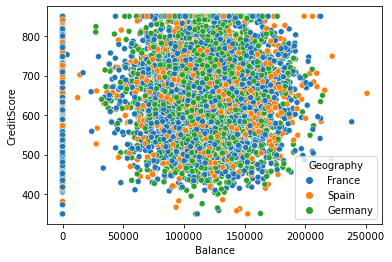

In [148]:
sns.scatterplot(x='Balance',y='CreditScore',data=custchurn,hue='Geography')

<AxesSubplot:xlabel='EstimatedSalary', ylabel='CreditScore'>

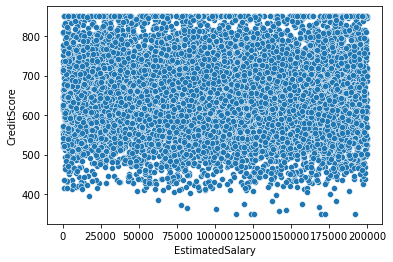

In [169]:
sns.scatterplot(x='EstimatedSalary',y='CreditScore',data=custchurn)

<AxesSubplot:xlabel='Tenure', ylabel='CreditScore'>

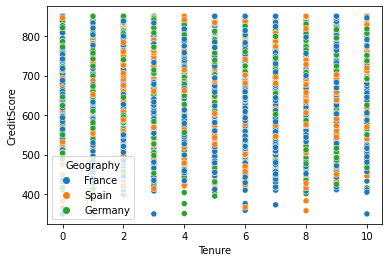

In [150]:
sns.scatterplot(x='Tenure',y='CreditScore',data=custchurn,hue='Geography')

all of them have no linear relationship with credit history

<AxesSubplot:>

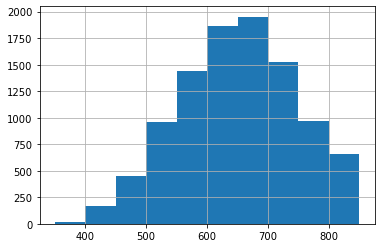

In [151]:
custchurn['CreditScore'].hist()

In [152]:
custchurn['CreditScore']=custchurn['CreditScore'].astype(int)

<AxesSubplot:xlabel='balance', ylabel='CreditScore'>

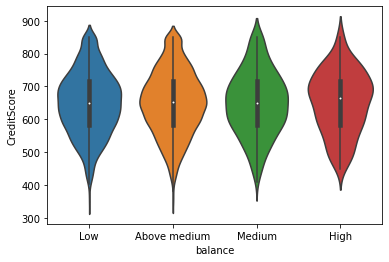

In [153]:
sns.violinplot(y='CreditScore',data=custchurn,x='balance',estimator=np.median)

<AxesSubplot:xlabel='salary', ylabel='CreditScore'>

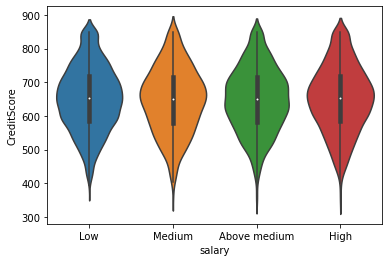

In [154]:
sns.violinplot(y='CreditScore',data=custchurn,x='salary',estimator=np.median)

<AxesSubplot:xlabel='tenure', ylabel='CreditScore'>

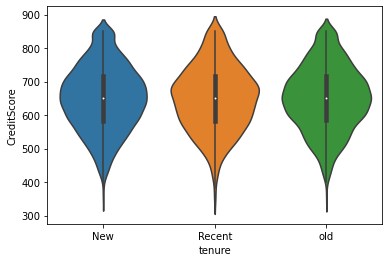

In [155]:
sns.violinplot(y='CreditScore',data=custchurn,x='tenure',estimator=np.median)

There is no relation between credit score and high salary/balance or old tenure 

### Q14: does active members / has more balance /salary more likely to spend more products?

<AxesSubplot:xlabel='IsActiveMember', ylabel='NumOfProducts'>

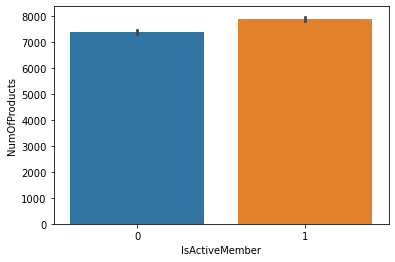

In [171]:
sns.barplot(x='IsActiveMember',y='NumOfProducts',data=custchurn,estimator=sum)

too close

<AxesSubplot:xlabel='balance', ylabel='count'>

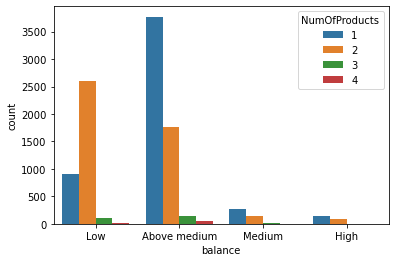

In [157]:
sns.countplot(x='balance',hue='NumOfProducts',data=custchurn)

NO

<AxesSubplot:xlabel='salary', ylabel='count'>

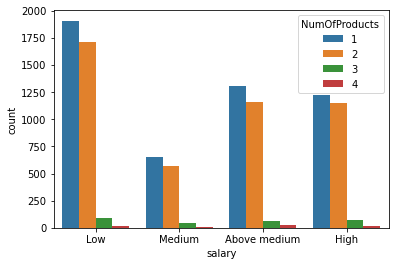

In [158]:
sns.countplot(x='salary',hue='NumOfProducts',data=custchurn)

In [187]:
high_salary=custchurn[custchurn['EstimatedSalary'] > 150000]

<AxesSubplot:ylabel='EstimatedSalary'>

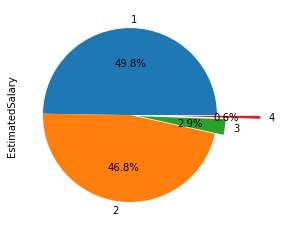

In [188]:
high_salary.groupby('NumOfProducts')['EstimatedSalary'].sum().plot(kind='pie',autopct='%1.1f%%',explode=(0,0,0.1,0.5))

NO

### Q15: which gender more active / has credit card ?

In [178]:
custchurn.groupby('Gender')['HasCrCard'].sum()

Gender
Female    3192
Male      3863
Name: HasCrCard, dtype: Int64

Males 

In [160]:
custchurn.groupby('Gender')['IsActiveMember'].sum()

Gender
Female    2284
Male      2867
Name: IsActiveMember, dtype: Int64

Males 

### Thanks
